<a href="https://colab.research.google.com/github/Ogunfool/Multi-class-logistic-regression-with-Python./blob/main/Sklearn_SGD_Classifier_MNISt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using Scikit learn SGDClassifier Class (Logistic regression + Log Loss).

In [1]:
from google.colab import files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, log_loss
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier

In [ ]:
%%time
from sklearn.datasets import fetch_openml
mnist = fetch_openml(data_id=554) # https://www.openml.org/d/554

In [3]:
type(mnist.data), type(mnist.categories), type(mnist.feature_names), type(mnist.target)

(pandas.core.frame.DataFrame, NoneType, list, pandas.core.series.Series)

In [4]:
mnist.data.shape, mnist.target.shape

((70000, 784), (70000,))

In [3]:
Xtemp_train, X_test, ytemp_train, y_test = train_test_split(mnist.data, 
                                                    mnist.target.astype('int'), #targets str to int convert
                                                   test_size=1/7.0,
                                                   random_state=0)

In [4]:
# Set shuffle to true to shuffle before split
X_train, X_val, y_train, y_val = train_test_split(Xtemp_train, ytemp_train, test_size = 0.2, random_state = 42, shuffle=True)

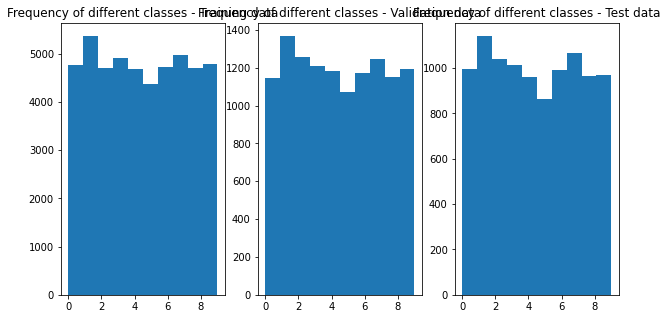

In [5]:
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.hist(y_train);
plt.title('Frequency of different classes - Training data');

plt.subplot(1,3,2)
plt.hist(y_val);
plt.title('Frequency of different classes - Validation data');

plt.subplot(1,3,3)
plt.hist(y_test);
plt.title('Frequency of different classes - Test data');

In [6]:
# Let's normalize data - StandardScaler
# Fit t0 training set and use mean and std to transform X_train and X_test
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [7]:
print(X_train_scaled.shape, X_val_scaled.shape, X_test_scaled.shape)

(48000, 784) (12000, 784) (10000, 784)


Let's select our model using cross validation and Gridsearch - GridCV in Sklearn. Note that after choosing the best hyperparameters, the CV models are discarded and the final model is trained with those hyperparameters.



Use SGD Classifier to compare results with mine.

In [10]:
KF = StratifiedKFold(n_splits = 3, random_state=42, shuffle=True)
param_grid = {'eta0': [0.001, 0.003, 0.01, 0.03, 0.1, 0.3],
              'penalty':['l2'],
              'alpha': [0.001, 0.003, 0.01, 0.03, 0.1, 0.3]}
SGD_classifier = SGDClassifier(fit_intercept=True,
                        max_iter=200,
                        verbose=2, # output progress
                        n_jobs=5, # parallelize over 5 processes
                        tol=0.001
                         )

SGD_classifierGridCV = GridSearchCV(SGD_classifier, param_grid, cv= KF)

In [ ]:
%%time
SGD_classifierGridCV.fit(X_train_scaled, y_train)

In [ ]:
# klearn got the same best hyperparameters as our OOP-python based model
SGD_classifierGridCV.best_params_

{'alpha': 0.001, 'eta0': 0.003, 'penalty': 'l2'}

In [ ]:
SGD_classifierGridCV.best_score_

0.9080833333333334

I want to compare these results with mine.
I got 83% accuracy while sklearn got 91% - Using the SGDClassifier, log loss function.

In [10]:
SGD_classifier_final = SGDClassifier(fit_intercept=True,
                        loss = 'log',
                        eta0=0.003,
                        alpha=0.001,
                        max_iter=200,
                        verbose=2, # output progress
                        n_jobs=5, # parallelize over 5 processes
                        tol=0.001
                         )

In [ ]:
SGD_classifier_final.fit(X_train_scaled, y_train)

In [12]:
SGD_classifier_final.score(X_val_scaled, y_val)

0.9081666666666667

In [ ]:
SGD_classifier_final.intercept_.shape

(10,)

In [13]:
SGD_classifier_final.coef_.shape

(10, 784)